In [1]:
from AgentBasedModel import *
from AgentBasedModel.science import *
import AgentBasedModel.utils.math as math

import random
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Huge graphs

In [2]:
data = list()
for _ in tqdm(range(300)):
    n_chart = random.randint(1, 39)
    n_fund = 40 - n_chart
    
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [
            *[Fundamentalist(exchange, 10*3) for _ in range(30)],
            *[Chartist(exchange, 10*3) for _ in range(30)]
        ],
        'events':  [
#             MarketMakerIn(0, 10**4),
#             PriceShock(300, -20)
        ]
    })
    info = simulator.info
    simulator.simulate(500, silent=True)
    
    data.append({
        'chartists': n_chart,
        'fundamentalists': n_fund,
        'trend': trend(info),
        'destruction': destruction(info, window=5),
        'efficiency': efficiency(info, access=1),
        'price volatility': info.price_volatility(),
        'return volatility': info.return_volatility(),
        'stock returns': math.mean(info.stock_returns()),
        'trader returns': math.mean([math.mean(r) for r in info.returns])
    })

data = pd.DataFrame(data)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [03:18<00:00,  1.51it/s]


In [3]:
data.columns

Index(['chartists', 'fundamentalists', 'trend', 'destruction', 'efficiency',
       'price volatility', 'return volatility', 'stock returns',
       'trader returns'],
      dtype='object')

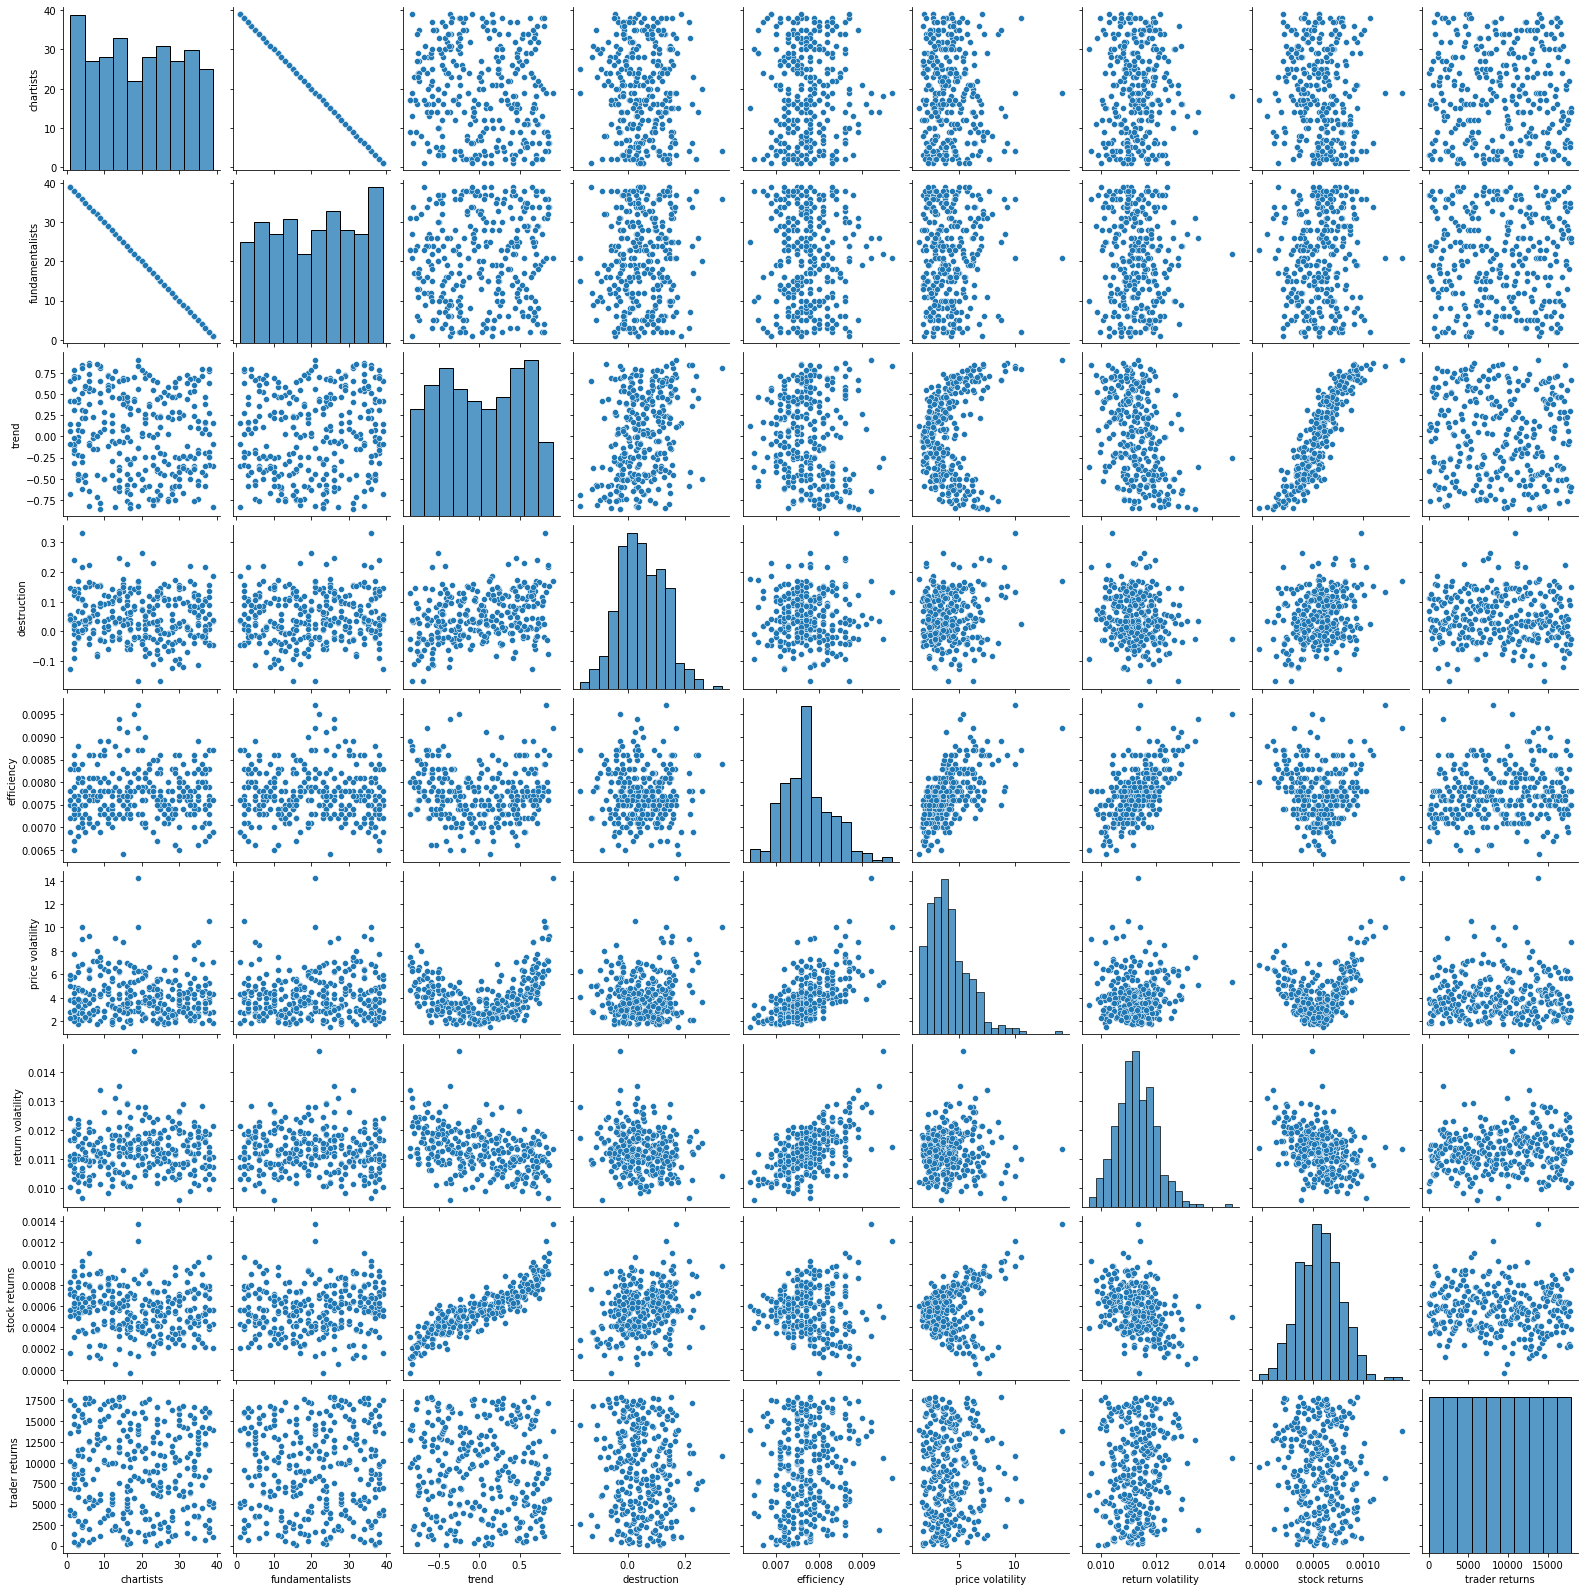

In [4]:
sns.pairplot(data=data)

<AxesSubplot:>

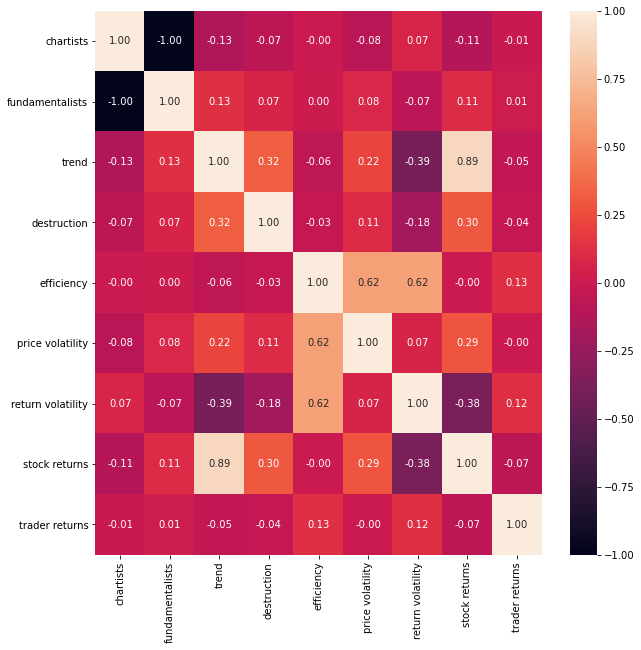

In [5]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

## Market states in different settings

### Random

In [6]:
data1 = list()
for _ in tqdm(range(100)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Random(exchange, 10**3) for _ in range(20)]
    })
    info = simulator.info
    simulator.simulate(500, silent=True)

    data1.append({
        'price trend': trend(info),
        'price volatility': info.price_volatility(),
        'return volatility': info.return_volatility(),
        'stock return': math.mean(info.stock_returns()),
        'trader return': math.mean([math.mean(r.values()) for r in info.returns]),
        'efficiency': efficiency(info),
        'destruction': destruction(info)
    })

data1 = pd.DataFrame(data1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.19it/s]


In [7]:
res1 = pd.DataFrame({
    'est': data1.mean(),
    'std': data1.std(),
    'ci95 left': data1.mean() - 2 * data1.std() / data1.shape[1]**.5,
    'ci95 right': data1.mean() + 2 * data1.std() / data1.shape[1]**.5,
    't': data1.mean() / data1.std() / data1.shape[1]**.5
}).round(5)
res1

,est,std,ci95 left,ci95 right,t
price trend,-0.00169,0.40362,-0.30679,0.30342,-0.00158
price volatility,1.52012,0.36694,1.24274,1.79750,1.56578
return volatility,0.00483,0.00062,0.00437,0.00530,2.96062
stock return,0.00051,0.00006,0.00046,0.00056,3.08138
trader return,0.00052,0.00004,0.00049,0.00056,4.59178
efficiency,0.05938,0.03305,0.03439,0.08437,0.67899
destruction,0.00784,0.09616,-0.06485,0.08053,0.03080


### Universalist

In [8]:
data2 = list()
for _ in tqdm(range(100)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Universalist(exchange, 10**3) for _ in range(20)]
    })
    info = simulator.info
    simulator.simulate(500, silent=True)

    data2.append({
        'price trend': trend(info),
        'price volatility': info.price_volatility(),
        'return volatility': info.return_volatility(),
        'stock return': math.mean(info.stock_returns()),
        'trader return': math.mean([math.mean(r.values()) for r in info.returns]),
        'efficiency': efficiency(info),
        'destruction': destruction(info)
    })

data2 = pd.DataFrame(data2)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72it/s]


In [9]:
res2 = pd.DataFrame({
    'est': data2.mean(),
    'std': data2.std(),
    'ci95 left': data2.mean() - 2 * data2.std() / data2.shape[1]**.5,
    'ci95 right': data2.mean() + 2 * data2.std() / data2.shape[1]**.5,
    't': data2.mean() / data2.std() / data2.shape[1]**.5
}).round(5)
res2

,est,std,ci95 left,ci95 right,t
price trend,-0.04035,0.55964,-0.46340,0.38270,-0.02725
price volatility,4.27330,1.96267,2.78966,5.75694,0.82294
return volatility,0.00715,0.00115,0.00628,0.00801,2.35944
stock return,0.00051,0.00024,0.00033,0.00069,0.79156
trader return,0.00073,0.00088,0.00006,0.00140,0.31299
efficiency,0.01715,0.00337,0.01460,0.01970,1.92211
destruction,0.10315,0.09665,0.03009,0.17621,0.40341


### Universalist with Market Maker

In [10]:
data3 = list()
for _ in tqdm(range(100)):
    exchange = ExchangeAgent(volume=1000)
    simulator = Simulator(**{
        'exchange': exchange,
        'traders': [Universalist(exchange, 10**3) for _ in range(20)],
        'events': [MarketMakerIn(0, 10**4)]
    })
    info = simulator.info
    simulator.simulate(500, silent=True)

    data3.append({
        'price trend': trend(info),
        'price volatility': info.price_volatility(),
        'return volatility': info.return_volatility(),
        'stock return': math.mean(info.stock_returns()),
        'trader return': math.mean([math.mean(r.values()) for r in info.returns]),
        'efficiency': efficiency(info),
        'destruction': destruction(info)
    })

data3 = pd.DataFrame(data3)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:38<00:00,  2.56it/s]


In [11]:
res3 = pd.DataFrame({
    'est': data3.mean(),
    'std': data3.std(),
    'ci95 left': data3.mean() - 2 * data3.std() / data3.shape[1]**.5,
    'ci95 right': data3.mean() + 2 * data3.std() / data3.shape[1]**.5,
    't': data3.mean() / data3.std() / data3.shape[1]**.5
}).round(5)
res3

,est,std,ci95 left,ci95 right,t
price trend,-0.06265,0.57174,-0.49485,0.36955,-0.04142
price volatility,4.22421,2.07728,2.65394,5.79448,0.76860
return volatility,0.00260,0.00054,0.00219,0.00301,1.81203
stock return,0.00049,0.00024,0.00031,0.00067,0.78438
trader return,0.00089,0.00041,0.00058,0.00120,0.82438
efficiency,0.02425,0.00681,0.01910,0.02939,1.34619
destruction,0.15457,0.19012,0.01085,0.29829,0.30728


## Comparisson

In [12]:
res1['model'] = 'Random'
res2['model'] = 'Universalist'
res3['model'] = 'Universalist with MM'
res = pd.concat([res1, res2, res3])
res.index.name = 'stat'

<BarContainer object of 3 artists>

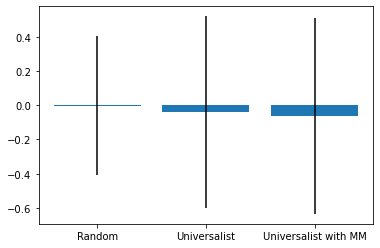

In [13]:
plt.bar(
    res[res.index == 'price trend']['model'],
    res[res.index == 'price trend']['est'],
    yerr=res[res.index == 'price trend']['std']
)

<BarContainer object of 3 artists>

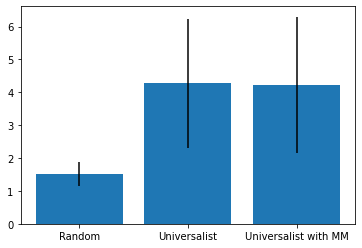

In [14]:
plt.bar(
    res[res.index == 'price volatility']['model'],
    res[res.index == 'price volatility']['est'],
    yerr=res[res.index == 'price volatility']['std']
)

<BarContainer object of 3 artists>

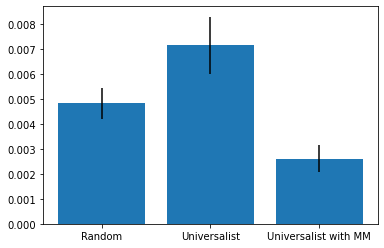

In [15]:
plt.bar(
    res[res.index == 'return volatility']['model'],
    res[res.index == 'return volatility']['est'],
    yerr=res[res.index == 'return volatility']['std']
)

<BarContainer object of 3 artists>

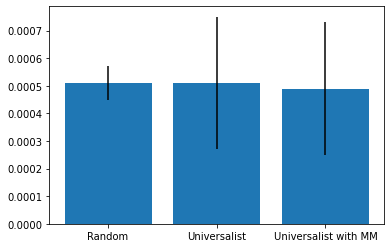

In [16]:
plt.bar(
    res[res.index == 'stock return']['model'],
    res[res.index == 'stock return']['est'],
    yerr=res[res.index == 'stock return']['std']
)

In [17]:
res.max(axis=0)

est                         4.2733
std                        2.07728
ci95 left                  2.78966
ci95 right                 5.79448
t                          4.59178
model         Universalist with MM
dtype: object

<BarContainer object of 3 artists>

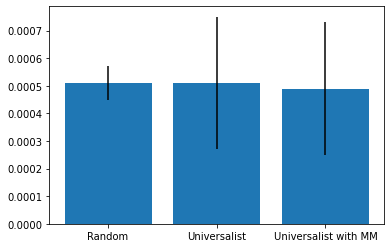

In [18]:
plt.bar(
    res[res.index == 'stock return']['model'],
    res[res.index == 'stock return']['est'],
    yerr=res[res.index == 'stock return']['std']
)

In [19]:
res.drop('model', axis=1) / res1.drop('model', axis=1)

,est,std,ci95 left,ci95 right,t
destruction,1.000000,1.000000,1.000000,1.000000,1.000000
destruction,13.156888,1.005096,-0.463994,2.188129,13.097727
destruction,19.715561,1.977121,-0.167309,3.704085,9.976623
efficiency,1.000000,1.000000,1.000000,1.000000,1.000000
efficiency,0.288818,0.101967,0.424542,0.233495,2.830837
efficiency,0.408387,0.206051,0.555394,0.348347,1.982636
price trend,1.000000,1.000000,1.000000,1.000000,1.000000
price trend,23.875740,1.386552,1.510479,1.261288,17.246835
price trend,37.071006,1.416530,1.612993,1.217949,26.215190
price volatility,1.000000,1.000000,1.000000,1.000000,1.000000


### Boxplot

In [45]:
res = pd.concat([data1, data2, data3])
res = (res - res.mean()) / res.std()
res['setting'] = [*['Random'] * 100, *['Universalist'] * 100, *['Universalist with MM'] * 100]
res = res.reset_index().drop('index', axis=1)
res = pd.melt(res, id_vars='setting', value_vars=res.columns[:-1])  # wide to long

In [46]:
res.head()

,setting,variable,value
0,Random,price trend,-0.471683
1,Random,price trend,-0.441852
2,Random,price trend,-1.318373
3,Random,price trend,0.200285
4,Random,price trend,-0.692702


Text(0.5, 1.0, 'Comparative analysis for market states with different settings')

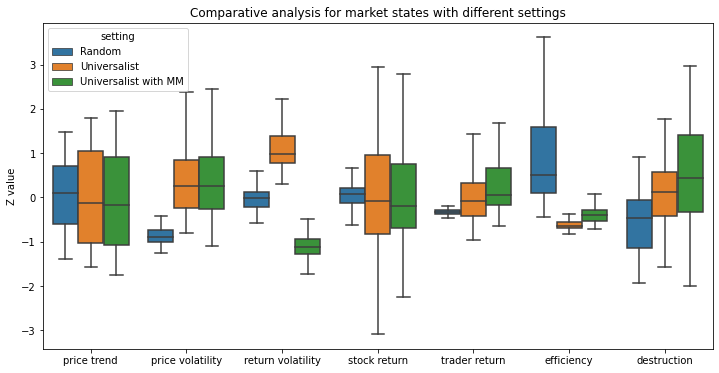

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=res, x='variable', y='value', hue='setting', showfliers=False)
plt.ylabel('Z value')
plt.xlabel('')
plt.title('Comparative analysis for market states with different settings')